In [14]:
import pyreadr
import pandas as pd

# Load the RData file
result = pyreadr.read_r('TEP_FaultFree_Training.RData')  # Replace with your file path

# Extract the data frame (assuming there's only one)
df = list(result.values())[0]

# Save the data frame to CSV
df.to_csv('TEP_FaultFree_Training.csv', index=True)  # Replace with your desired output file path

In [1]:
# Loading all the required packages
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv('TEP_FaultFree_Training.csv', index_col=0)
df.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


500.0
500


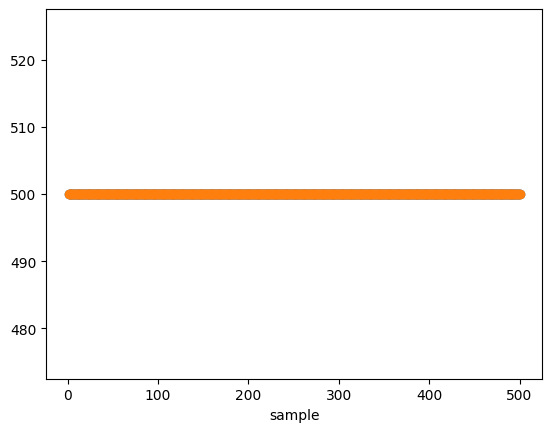

In [2]:
# Fault number should be 0 throughout
df['faultNumber'].value_counts()

# Checking that each simulation run has 500 entries
df['simulationRun'].value_counts().sort_values(ascending=False).plot(style='o')
print(df['simulationRun'].max())

# Checking that each sample also has 500 entries (only for training case, test should have 960)
df['sample'].value_counts().sort_values(ascending=False).plot(style='o')
print(df['sample'].max())

# Sanity check, number of total entries should be max. simulationNum times max. sample
assert len(df)==df['simulationRun'].max()*df['sample'].max(), 'sanity check does not hold'

In [34]:
mapping_dict ={
    'Input':['XMEAS_1','XMEAS_2','XMEAS_3','XMV_1','XMV_2','XMV_3'],
    'Reactor':['XMEAS_5','XMEAS_6','XMEAS_7','XMEAS_8','XMEAS_9','XMEAS_21','XMEAS_23','XMEAS_24','XMEAS_25','XMEAS_26','XMEAS_27','XMEAS_28','XMV_10'],
    'Separator':['XMEAS_11','XMEAS_12','XMEAS_13','XMEAS_14','XMV_7'],
    'Stripper':['XMEAS_4','XMEAS_15','XMEAS_16','XMEAS_17','XMEAS_18','XMEAS_19','XMV_4','XMV_8','XMV_9'],
    'Compressor':['XMEAS_20','XMV_5'],
    'Condenser':['XMEAS_22','XMV_11'],
    'Purge':['XMEAS_10','XMEAS_29','XMEAS_30','XMEAS_31','XMEAS_32','XMEAS_33','XMEAS_34','XMEAS_35','XMEAS_36','XMV_6'],
    'Product':['XMEAS_37','XMEAS_38','XMEAS_39','XMEAS_40','XMEAS_41']
}

In [21]:
length = 0
for keys in mapping_dict.keys():
   length+=len(mapping_dict[keys])
length

52

In [ ]:
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
# 'XMV_12':'Agitator_speed'
   }

df = df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
df.head()

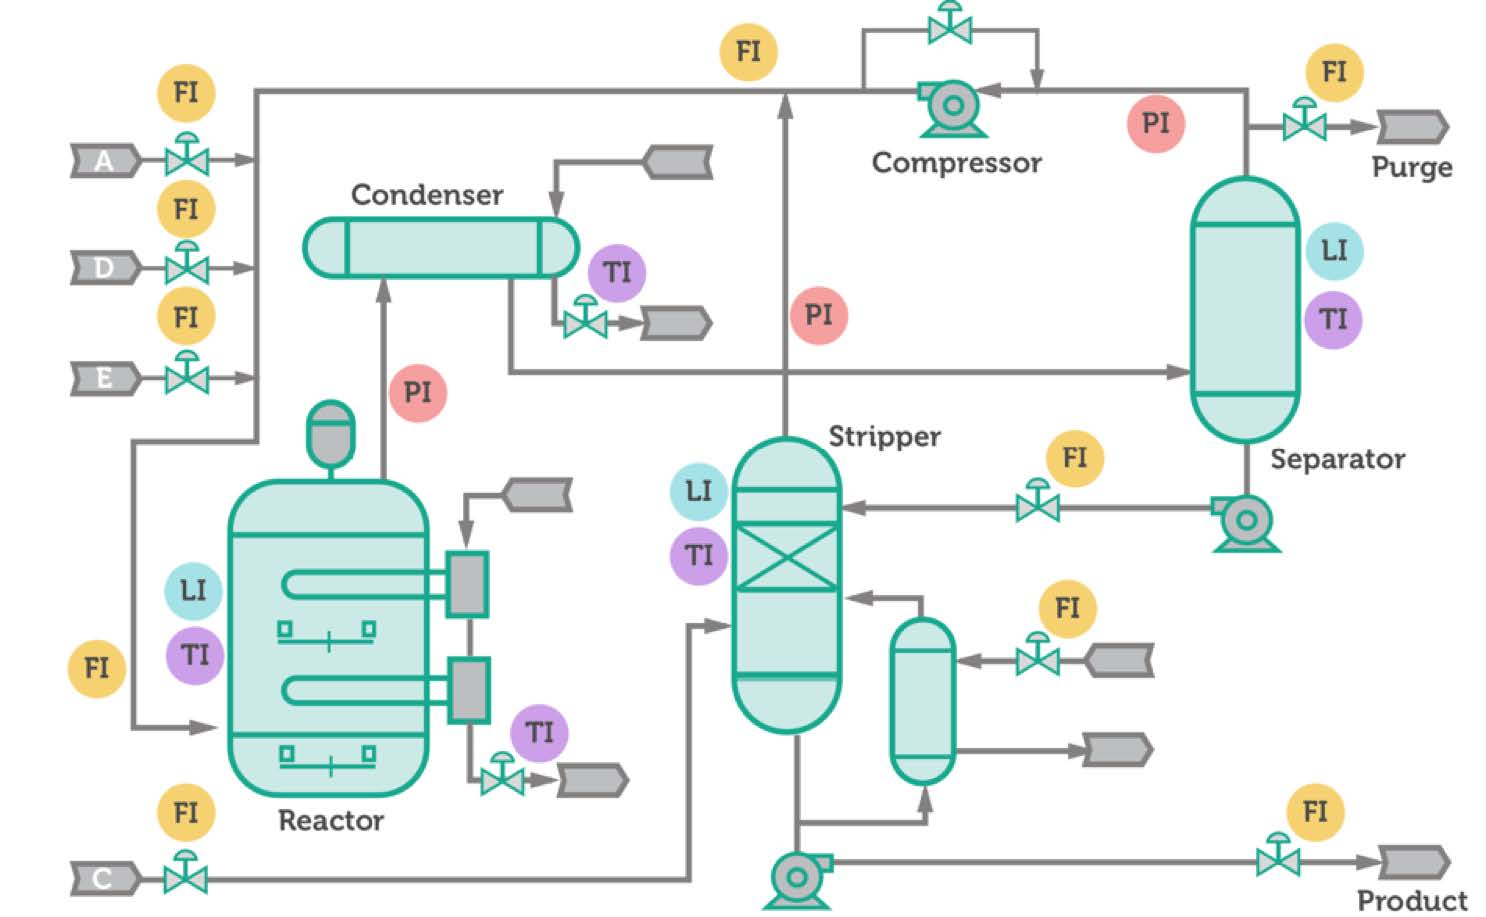

In [4]:
# display the image
from IPython.display import Image
Image("image.png")

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
from openai import AzureOpenAI
    
client = AzureOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  
    api_version="2023-12-01-preview",
    azure_endpoint=os.getenv("OPENAI_API_BASE")
)

In [4]:
context_prompt='''The TEP is comprised of 8 chemical components in total: 4 reactants, 2 products, 1 by-product and 1 inert component.
These components undergo a chemical process dominated by 5 main process units: a reactor that allows for the reaction of the gaseous feed components (A, C, D and E) into liquid products (G and H), a condenser to cool-down the gaseous product stream coming out of the reactor, a gas-liquid separator to split gas and liquid components from the cooled product stream, a centrifugal compressor to flow this gas stream back into the reactor and a stripper to handle the efficient separation of the 2 products from any unreacted feed components.
There is also a purge to remove the inert (B) and the by-product (F) from the system
From this entire process, we can get over 50 different variables that record properties of the system such as the flowrates, pressures, temperatures, levels, mole fractions and compressor power outputs. Over 10 of these are manipulated variables (flowrates, valve positions and the reaction agitator speed) which the operator can control to ensure that the chemical process is operating under control.
At the current time of writing, one of the most prevalent sources of TEP data comes from here, which is the dataset set referenced in Rieth et al. (2017). In this dataset, process variables are sampled every 3 minutes for 25 hours in the training dataset, and 48 hours for the testing dataset.
'''

In [38]:
edge_list = """
(node_a_var1 -> node_b_var1)
(node_a_var2 -> node_b_var2)
"""

In [39]:
def parse_edges(edge_list):
    """
    Parse a list of edges given in a string format.

    Args:
    edge_list (str): A string containing edges in the format "(node_a_var -> node_b_var)".

    Returns:
    list: A list of tuples representing edges.
    """
    edges = []
    for edge in edge_list.strip().split("\n"):
        edge = edge.strip()
        if edge.startswith("(") and edge.endswith(")"):
            nodes = edge[1:-1].split(" -> ")
            if len(nodes) == 2:
                edges.append((nodes[0].strip(), nodes[1].strip()))
    return edges


In [49]:
prompt = '''
Given there exists a causal edge between two nodes {node_a} and {node_b} in the process diagram, we want to construct a causal graph.

{node_a} consists of the following sub-nodes: {node_a_vars}
{node_b} consists of the following sub-nodes: {node_b_vars}

The causal graph should be constructed in such a way that it represents the causal relationship between the variables of {node_a} and {node_b}.

List all the edges that should be present between the nodes of {node_a} and nodes of {node_b} in the causal graph in the format:

{edge_list}
'''

In [25]:
def list_all_node_names(key,mapping_dictionary, original_dictionary)->list:
    '''
    This function lists all the node names present in the mapping dictionary
    '''
    node_names = []
    list_of_nodes = mapping_dictionary[key]
    for node in list_of_nodes:
        node_names.append(original_dictionary[node])
    return node_names

In [ ]:
messages=[]
messages.append({"role": "system", "content": context_prompt})
messages.append({"role": "user", "content": prompts[0]})
 
chat_completion = client.chat.completions.create(     
    model="gpt-35-turbo",
    messages=messages
)
result=chat_completion.choices[0].message.content
result

In [50]:
edges = [
    ('Reactor', 'Condenser'),
    ('Condenser', 'Separator'),
    ('Separator', 'Compressor'),
    ('Compressor', 'Reactor'),
    ('Separator', 'Stripper'),
    ('Stripper', 'Product'),
    ('Separator', 'Purge')
]

In [53]:
prompts = []
for edge in edges:
    prompt_copy=prompt
    prompt_copy = prompt_copy.replace("{node_a}", edge[0])
    prompt_copy = prompt_copy.replace("{node_b}", edge[1])
    prompt_copy = prompt_copy.replace("{node_a_vars}", str(list_all_node_names(edge[0],mapping_dict,X_dict)))
    prompt_copy = prompt_copy.replace("{node_b_vars}", str(list_all_node_names(edge[1],mapping_dict,X_dict)))
    prompt_copy = prompt_copy.replace("{edge_list}", edge_list)

    prompts.append(prompt_copy)


In [54]:
prompts

["\nGiven there exists a causal edge between two nodes Reactor and Condenser in the process diagram, we want to construct a causal graph.\n\nReactor consists of the following sub-nodes: ['Recycle_flow_into_rxtr', 'Reactor_feed_rate', 'Reactor_pressure', 'Reactor_level', 'Reactor_temp', 'Reactor_cooling_water_outlet_temp', 'Composition_of_A_rxtr_feed', 'Composition_of_B_rxtr_feed', 'Composition_of_C_rxtr_feed', 'Composition_of_D_rxtr_feed', 'Composition_of_E_rxtr_feed', 'Composition_of_F_rxtr_feed', 'Reactor_cooling_water_flow_valve']\nCondenser consists of the following sub-nodes: ['Condenser_cooling_water_outlet_temp', 'Condenser_cooling_water_flow_valve']\n\nThe causal graph should be constructed in such a way that it represents the causal relationship between the variables of Reactor and Condenser.\n\nList all the edges that should be present between the nodes of Reactor and nodes of Condenser in the causal graph in the format:\n\n\n(node_a_var1 -> node_b_var1)\n(node_a_var2 -> node

In [61]:
final_edges=[]
for pmpt in prompts:
    messages=[]
    messages.append({"role": "system", "content": context_prompt})
    messages.append({"role": "user", "content": pmpt})

    chat_completion = client.chat.completions.create(     
        model="gpt-4-turbo",
        messages=messages
    )
    result=chat_completion.choices[0].message.content
    print(result)
    final_edges.extend(parse_edges(result))
    print('----------------------')

A causal graph aims to represent the causality or the directional influence one set of variables has over another. Given the context of a Reactor and a Condenser in a process flow, one would construct a causal graph that represents the flow of influence from the Reactor's operations to the performance and conditions within the Condenser.

We have to consider the physical process: The outputs from the Reactor are fed into the Condenser, where the Reactor's reaction mix is cooled down. Therefore, the causal edges should represent how the Reactor's output characteristics influence the Condenser's operation parameters.

Among the sub-nodes listed, only some will directly affect the performance of the Condenser. For example, the Reactor temperature ('Reactor_temp') will directly affect the temperature at the Condenser inlet, hence the 'Condenser_cooling_water_outlet_temp' will be influenced by the heat exchange process that occurs in the Condenser. Furthermore, the 'Reactor_cooling_water_fl

In [64]:
len(final_edges)

82

Text(0.5, 1.0, 'Causal Graph of TEP Process')

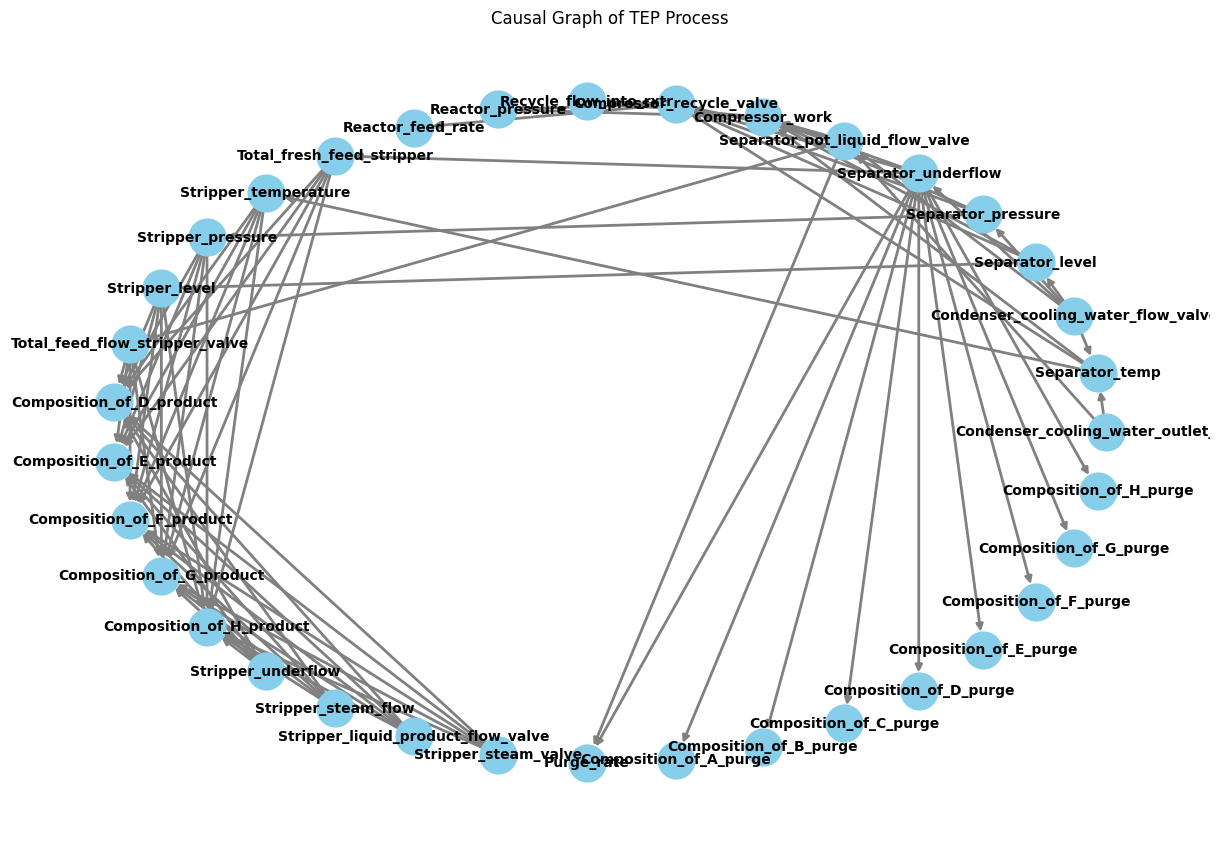

In [68]:
# create a networkx graph
import networkx as nx
G = nx.DiGraph()

# add edges to the graph
G.add_edges_from(final_edges)

# draw the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", width=2, edge_color="gray")
plt.title("Causal Graph of TEP Process")

In [69]:
prompt = '''
Our task is to construct a causal graph. 
Till this point, we have been able to construct the graph between differnet components in the TEP process.
The causal edges between the components are : {edges}

Now, our task is to predict the intra-component causal relationships.
Given the component {node_a}, which consists of the following nodes as subcomponents: {node_a_vars}

List all the edges that should be present between the sub-component nodes of {node_a} in the causal graph in the format:

{edge_list}
'''

In [70]:
intra_edges=[]
for key in mapping_dict.keys():
    prompt_copy=prompt
    prompt_copy = prompt_copy.replace("{node_a}", key)
    prompt_copy = prompt_copy.replace("{node_a_vars}", str(list_all_node_names(key,mapping_dict,X_dict)))
    prompt_copy = prompt_copy.replace("{edges}", str(edges))
    prompt_copy = prompt_copy.replace("{edge_list}", edge_list)

    messages=[]
    messages.append({"role": "system", "content": context_prompt})
    messages.append({"role": "user", "content": prompt_copy})

    chat_completion = client.chat.completions.create(     
        model="gpt-4-turbo",
        messages=messages
    )
    result=chat_completion.choices[0].message.content
    print(result)
    intra_edges.extend(parse_edges(result))
    print('----------------------')


Constructing a causal graph for the input subcomponents of the TEP process requires understanding the logical flow and dependencies of the feed streams and valves. The input subcomponents consist of feed streams for chemicals A, D, and E and their respective flow valves.

In a chemical process plant, feed flow valves are used to control the rate at which the feed streams enter the reactor. Thus, the valves have a direct impact on the feed streams' flowrate, and we can infer the following causal relationships:

1. The operation of the A_feed_flow_valve affects the A_feed_stream's flowrate.
2. The operation of the D_feed_flow_valve affects the D_feed_stream's flowrate.
3. The operation of the E_feed_flow_valve affects the E_feed_stream's flowrate.

Given this information, we can list the causal edges as follows:

(A_feed_flow_valve -> A_feed_stream)
(D_feed_flow_valve -> D_feed_stream)
(E_feed_flow_valve -> E_feed_stream)

These edges represent the direct causal influence of the valves o

Text(0.5, 1.0, 'Causal Graph of TEP Process')

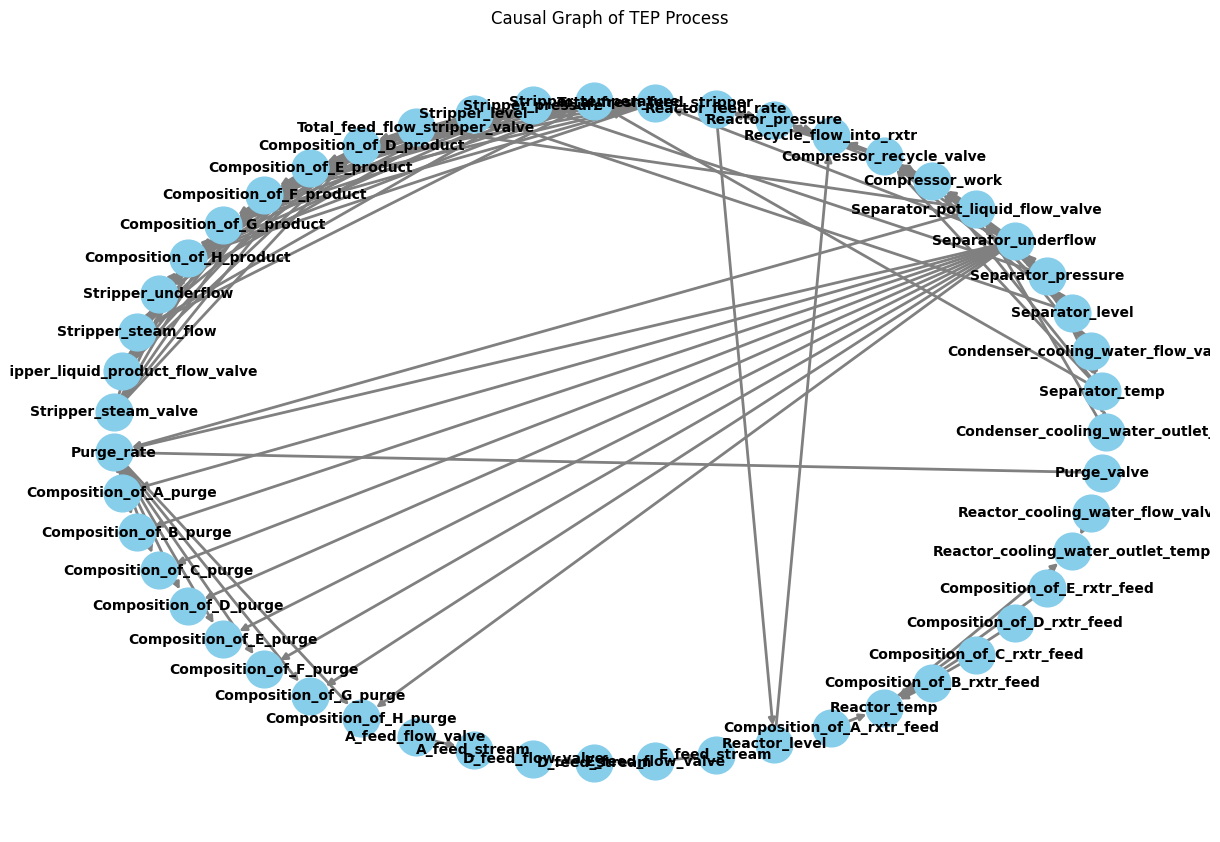

In [71]:
G.add_edges_from(intra_edges)

plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", width=2, edge_color="gray")
plt.title("Causal Graph of TEP Process")

In [72]:
# print the number of nodes and edges in the networkx graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 51
Number of edges: 127


In [75]:
# Get the node ordering used in the adjacency matrix
nodes = list(G.nodes())

# Print the adjacency matrix and the corresponding nodes
print("Nodes:", nodes)
# convert the graph to an adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()
adj_matrix

Nodes: ['Condenser_cooling_water_outlet_temp', 'Separator_temp', 'Condenser_cooling_water_flow_valve', 'Separator_level', 'Separator_pressure', 'Separator_underflow', 'Separator_pot_liquid_flow_valve', 'Compressor_work', 'Compressor_recycle_valve', 'Recycle_flow_into_rxtr', 'Reactor_pressure', 'Reactor_feed_rate', 'Total_fresh_feed_stripper', 'Stripper_temperature', 'Stripper_pressure', 'Stripper_level', 'Total_feed_flow_stripper_valve', 'Composition_of_D_product', 'Composition_of_E_product', 'Composition_of_F_product', 'Composition_of_G_product', 'Composition_of_H_product', 'Stripper_underflow', 'Stripper_steam_flow', 'Stripper_liquid_product_flow_valve', 'Stripper_steam_valve', 'Purge_rate', 'Composition_of_A_purge', 'Composition_of_B_purge', 'Composition_of_C_purge', 'Composition_of_D_purge', 'Composition_of_E_purge', 'Composition_of_F_purge', 'Composition_of_G_purge', 'Composition_of_H_purge', 'A_feed_flow_valve', 'A_feed_stream', 'D_feed_flow_valve', 'D_feed_stream', 'E_feed_flow_

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
# convert the adjacency matrix to a pandas DataFrame with columns as nodes and index as nodes
import pandas as pd
adj_df = pd.DataFrame(adj_matrix, columns=nodes, index=nodes)
# save the df as a csv
adj_df.to_csv('adjacency_matrix.csv')
adj_df.head()

,Condenser_cooling_water_outlet_temp,Separator_temp,Condenser_cooling_water_flow_valve,Separator_level,Separator_pressure,Separator_underflow,Separator_pot_liquid_flow_valve,Compressor_work,Compressor_recycle_valve,Recycle_flow_into_rxtr,...,Reactor_level,Composition_of_A_rxtr_feed,Reactor_temp,Composition_of_B_rxtr_feed,Composition_of_C_rxtr_feed,Composition_of_D_rxtr_feed,Composition_of_E_rxtr_feed,Reactor_cooling_water_outlet_temp,Reactor_cooling_water_flow_valve,Purge_valve
Condenser_cooling_water_outlet_temp,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Separator_temp,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Condenser_cooling_water_flow_valve,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Separator_level,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Separator_pressure,0,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
